# INF-616 - Tarefa 3

Professor: Alexandre Ferreira -- melloferreira@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br  
Aluno: Anderson Rocha e Felipe Pereira   

Instituto de Computação - Unicamp  
2018

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline

np.random.seed(13)

In [2]:
# O codigo abaixo ira baixar e carregar o conjunto `spambase`.
# Leia sobre este conjunto aqui: https://archive.ics.uci.edu/ml/datasets/spambase

target_names = ['not-spam', 'spam']
label_field = 'label'
attributes = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
              'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
              'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
              'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
              'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
              'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
              'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
              'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
              'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
              'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
              'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
              'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
              'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
              'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
              'capital_run_length_total', label_field]
features = [a for a in attributes if a != 'label']

d = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',
                header=None, names=attributes, delimiter=',')

Conjunto Spambase treino:
amostras: 2226
características: 57
frequência das classes: {'not-spam': 2091, 'spam': 135}
Conjunto Spambase test:
amostras: 1151
características: 57
frequência das classes: {'not-spam': 697, 'spam': 454}


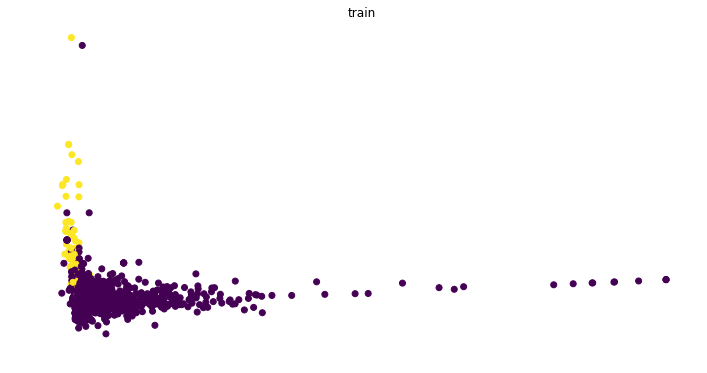

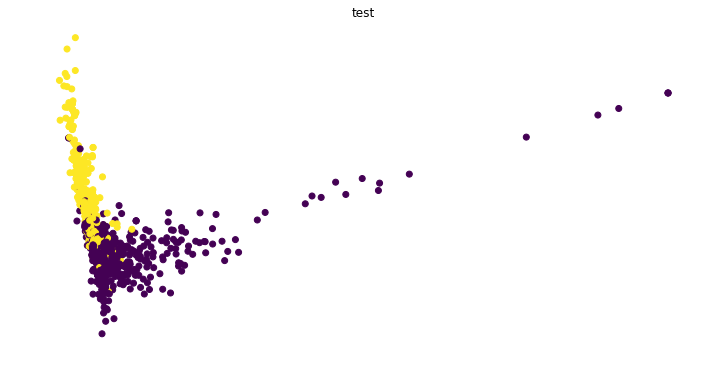

In [3]:
def describe(x, y, classes):
    """Descreve um conjunto de dados.
    
    :param x: np.ndarray, as amostras no conjunto.
    :param y: np.ndarray, os rotulos associados as amostras `x`.
    :param classes: list, uma lista com os nomes de cada classe. 
    """
    print('amostras:', x.shape[0])
    print('características:', x.shape[1])

    _, counts = np.unique(y, return_counts=True)
    print('frequência das classes:', dict(zip(classes, counts)))

def show_datasets(x, y, title):
    """Encontra um "embedding" de um conjunto que alinha as direções
       de maximiza separação das amostras com os eixos da base canônica.
    
    :param x: np.ndarray, as amostras do conjunto.
    :param y: np.ndarray, os rotulos associados as amostras `x`.
    :param title: str, o titulo do conjunto a ser exibido.
    """
    e = make_pipeline(
        StandardScaler(),
        PCA(n_components=2)
    ).fit_transform(x)

    _ = plt.figure(figsize=(12, 6))
    _ = plt.scatter(e[:, 0], e[:, 1], c=y)
    _ = plt.title(title)
    _ = plt.axis('off')

x_train, x_test, y_train, y_test = train_test_split(d[features], d['label'],
                                                    test_size=0.25,
                                                    random_state=1821)

# Seleciona 10% dos spams.
p, = np.where(y_train == 1)
np.random.shuffle(p)
p = p[:int(.1 * len(p))]
# Encontra os indices em treino que pertencem aos 10% selecionados.
p = np.in1d(np.arange(len(y_train)), p)
# Seleciona todos os nao-spam ou os 10% spams selecionados.
p = (y_train == 0) | p
# Filtra o conjunto de treino, mantendo somente os selecionados.
x_train, y_train = x_train[p], y_train[p]

print('Conjunto Spambase treino:')
describe(x_train, y_train, target_names)
print('Conjunto Spambase test:')
describe(x_test, y_test, target_names)
show_datasets(x_train, y_train, 'train')
show_datasets(x_test, y_test, 'test')

**Utilizando tudo o que você aprendeu até aqui (e.g. CV, otimização de hiper-parâmetros, regularização), defina e treine um estimador para este problema. Avalie seu estimador sobre o conjunto de teste.**

Dica: vários estimadores possuem regularizadores implementados internamente, expondo somente um parâmetro a ser ajustado. Exemplos: `KNeighborsClassifier`, `RandomForestClassifier`, `SVC`, `MLPClassifier`, `SGDClassifier`, `Perceptron`.

In [4]:
# from sklearn import ...
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

metric = metrics.accuracy_score

# Treine o modelo sobre o conjunto de treino...
param_grid = {
    'svc__C': [1e-3, 1, 10, 100],
    'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    'svc__class_weight': [None, 'balanced']
}


# Usando o GridSearchCV para fazer a validação cruzada dos parametros.
model = make_pipeline(StandardScaler(), SVC())
grid = GridSearchCV(model, param_grid, cv=10)
grid.fit(x_train, y_train)

# Avalie seu treinamento sobre o conjunto de teste...
print('best parameters are', grid.best_params_, 'with score', grid.best_score_)
print('test accuracy:', metric(y_test, grid.predict(x_test)))

/home/anderson/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/anderson/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


best parameters are {'svc__C': 10, 'svc__class_weight': None, 'svc__kernel': 'rbf'} with score 0.9636118598382749
test accuracy: 0.8140747176368376


**Utilize uma ou mais técnicas da biblioteca imbalanced-learn e compare os resultados com os obtidos acima**

Número de linhas no conjunto original 2226
Número de linhas após over sampling para as variações do SMOTE: 4182 com o tipo: regular
Conjunto Spambase apos balanceamento com SMOTE tipo: regular:
amostras: 4182
características: 57
frequência das classes: {'not-spam': 2091, 'spam': 2091}
best parameters are {'svc__C': 100, 'svc__class_weight': None, 'svc__kernel': 'rbf'} with score 0.9751315160210425
test accuracy: 0.8262380538662033
----------------------------------------------------------------------
Número de linhas após over sampling para as variações do SMOTE: 4182 com o tipo: borderline1
Conjunto Spambase apos balanceamento com SMOTE tipo: borderline1:
amostras: 4182
características: 57
frequência das classes: {'not-spam': 2091, 'spam': 2091}
best parameters are {'svc__C': 10, 'svc__class_weight': None, 'svc__kernel': 'rbf'} with score 0.9844571975131516
test accuracy: 0.8601216333622936
----------------------------------------------------------------------
Número de linhas após ov

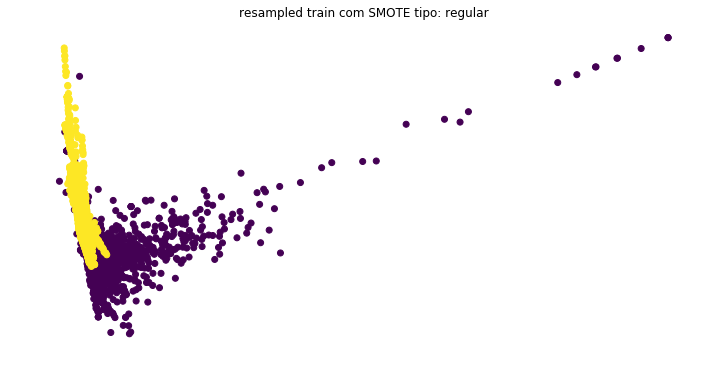

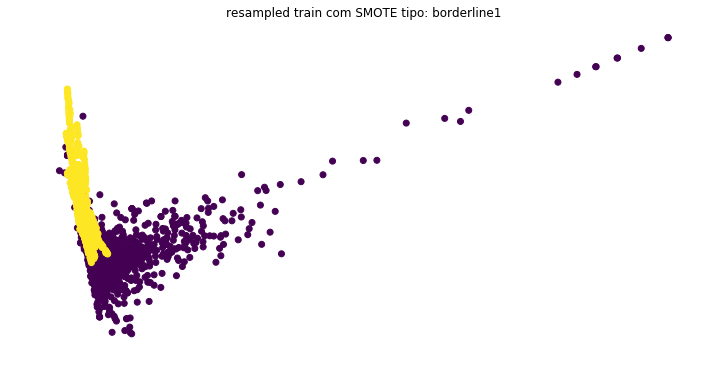

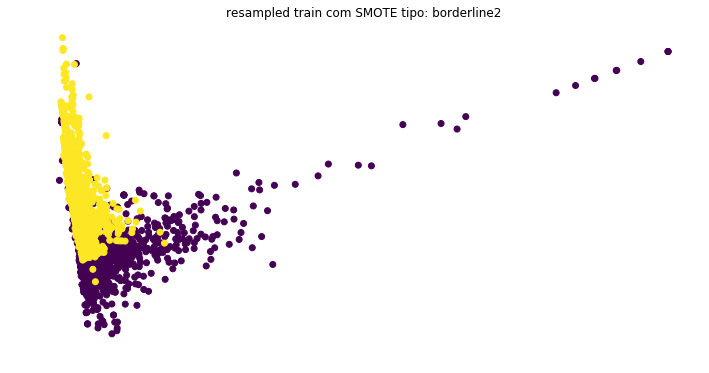

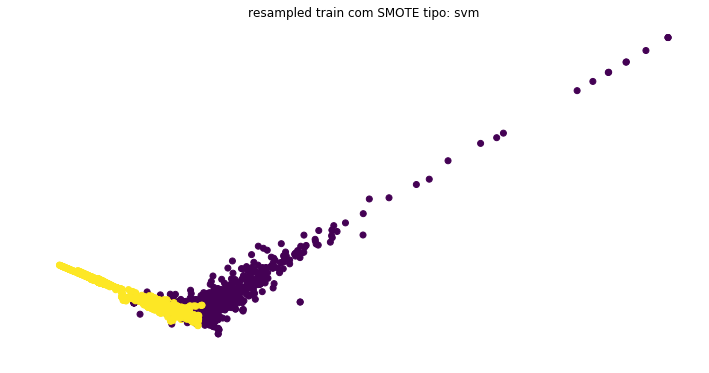

In [5]:
# from imblearn.over_sampling import ...
from imblearn.over_sampling import SMOTE
# Veja a documentação para exemplos:
# http://contrib.scikit-learn.org/imbalanced-learn/stable/introduction.html

# TODO -- Aplica PCA para melhor visualização em 2D

# Aplica o SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
x_resampled = []
y_resampled = []
for method in sm:
    x_res, y_res = method.fit_sample(x_train, y_train)
    x_resampled.append(x_res)
    y_resampled.append(y_res)
    
print('Número de linhas no conjunto original', len(x_train))

for i in range(len(x_resampled)):
    quantidade = len(x_resampled[i])
    tipo = kind[i]
    print(f"Número de linhas após over sampling para as variações do SMOTE: {quantidade} com o tipo: {tipo}")
    
    print(f'Conjunto Spambase apos balanceamento com SMOTE tipo: {tipo}:')
    describe(x_resampled[i], y_resampled[i], target_names)
    show_datasets(x_resampled[i], y_resampled[i], f'resampled train com SMOTE tipo: {tipo}')

    # Usando o GridSearchCV para fazer a validação cruzada dos parametros.
    model = make_pipeline(StandardScaler(), SVC())
    grid = GridSearchCV(model, param_grid, cv=2)
    grid.fit(x_resampled[i], y_resampled[i])

    # Avalie seu treinamento sobre o conjunto de teste...
    print('best parameters are', grid.best_params_, 'with score', grid.best_score_)
    print('test accuracy:', metric(y_test, grid.predict(x_test)))
    
    print('----------------------------------------------------------------------')